<a href="https://colab.research.google.com/github/leobioinf0/Base_de_dades/blob/main/S13_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT Academy - Data Science with Python
## Sprint 13. Relational databases
### S13 T02: Relational databases

## Install dependencies

In [ ]:
!apt-get update
!apt-get install mysql-server

In [10]:
!pip3 install --upgrade mysql-connector

## Import dependencies

In [ ]:
import mysql.connector
import pandas as pd

import pandas as pd
from pandas.api.types import infer_dtype
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_bool_dtype
from pandas.api.types import is_datetime64_dtype
from pandas.api.types import is_object_dtype
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
%matplotlib inline

## Functions

In [ ]:
def custom_plots(dat, color, title, ax=None, cW=None):
    '''
    Generate proportion histogram and tescriptive table of variable 
    taking into account the type of data
    ''' 
    if ax is None:
        ax = plt.gca()
    if is_categorical_dtype(dat):
        desc_table = dat.describe().to_frame().T
        if dat.nunique() > 31:
            top20 = dat.value_counts().head(20)/len(dat)
            ax.barh(y=top20.index,
                    width=top20,
                    color=color)
            title = title + ' ' +"Top-20"
        else:
            sns.countplot(x=dat, ax=ax)


    elif is_bool_dtype(dat):
        desc_table = dat.describe().to_frame().T
        ax.pie(dat.value_counts(),
               labels = dat.unique(),
               startangle=45,
               autopct=lambda p: '{:.3f}%({:.0f})'.format(p,(p/100)*len(dat)))

    elif is_datetime64_dtype(dat):
        desc_table = dat.describe().to_frame().T
        sns.histplot(x=dat, stat="proportion", color=color,
                     kde=True, ax=ax)
        
    elif infer_dtype(dat) == "string":
        desc_table = dat.describe().to_frame().T
        ax.pie(dat.value_counts(),labels = dat.unique(),startangle=45,autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*len(dat)))
    else:
        desc_table = round(dat.describe(),2).to_frame().T
        
        if dat.nunique() == 2:
            ax.pie(dat.value_counts(),
               labels = dat.unique(),
               startangle=45,
               autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*len(dat)))
        
        elif dat.nunique() == 6:
            sns.countplot(x=dat, ax=ax)
        else:
            sns.histplot(x=dat, stat="count", color=color,kde=True, ax=ax)
    
    the_table = ax.table(cellText=desc_table.values,
            colLabels=desc_table.columns,
            loc='top',
            colWidths=cW)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9)

    ax.set_title(title + ' ' + dat.name,fontsize = 10,fontweight = "bold",loc='center',pad=31)
    ax.set_xlabel("")
    return(ax)


# Level 1

- Exercise 1  

  - Create a simple relational database using MySQL (https://www.mysql.com/) and connect it to Python

## Starting MySQL database server

In [2]:
!service mysql start

 * Starting MySQL database server mysqld
   ...done.


In [3]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'"

ERROR 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)


## Create Connection to the MySQL server

In [4]:
db = mysql.connector.connect(
    host = "localhost",
    user = 'root',
    password = 'root')

## Create a connection cursor

In [5]:
mycursor = db.cursor()

## Create Database

In [6]:
mycursor.execute("DROP DATABASE IF EXISTS tienda")
mycursor.execute("CREATE DATABASE tienda")

## Show Database

In [7]:
mycursor.execute("SHOW DATABASES")
for x in mycursor:
  print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('tienda',)


## Create Connection to the database

In [8]:
mydb = mysql.connector.connect(
      host = "localhost",
      user = 'root',
      password = 'root',
      database = 'tienda'
      )
mycursor = mydb.cursor()

## Create Tables

In [9]:
mycursor.execute("DROP TABLE IF EXISTS CUSTOMERS")
mycursor.execute("CREATE TABLE CUSTOMERS (\
					customer_ID INT AUTO_INCREMENT PRIMARY KEY,\
					customer_name VARCHAR(255),\
					customer_lastname VARCHAR(40),\
					customer_street VARCHAR(255),\
					customer_city VARCHAR(255),\
					customer_zip VARCHAR(5),\
					customer_phone VARCHAR(255),\
					customer_email VARCHAR(255))"
					)

mycursor.execute("DROP TABLE IF EXISTS PRODUCT_TYPE")
mycursor.execute("CREATE TABLE PRODUCT_TYPE (\
					product_type_ID INT AUTO_INCREMENT PRIMARY KEY,\
					product_type_name VARCHAR(40),\
					product_type_description VARCHAR(40))"
					)

mycursor.execute("DROP TABLE IF EXISTS PRODUCTS")
mycursor.execute("CREATE TABLE PRODUCTS (\
					product_ID INT NOT NULL AUTO_INCREMENT,\
					product_type_ID INT NOT NULL,\
					product_name VARCHAR(40) NOT NULL,\
					product_price FLOAT NOT NULL,\
					product_color VARCHAR(40) NOT NULL,\
					product_size FLOAT NOT NULL,\
					product_description VARCHAR(40) NOT NULL,\
					PRIMARY KEY (product_ID),\
					FOREIGN KEY (product_type_ID) REFERENCES PRODUCT_TYPE (product_type_ID))"
					)

mycursor.execute("DROP TABLE IF EXISTS ESTABLISHMENT")
mycursor.execute("CREATE TABLE ESTABLISHMENT (\
					establishment_ID INT AUTO_INCREMENT PRIMARY KEY,\
					establishment_name VARCHAR(40),\
					establishment_street VARCHAR(255),\
					establishment_city VARCHAR(255),\
					establishmentr_zip VARCHAR(5),\
					establishment_phone VARCHAR(255),\
					establishment_email VARCHAR(255),\
					establishment_start DATE NOT NULL,\
					establishment_ends DATE NULL)"
					)

mycursor.execute("DROP TABLE IF EXISTS WORKERS")
mycursor.execute("CREATE TABLE WORKERS (\
					worker_ID INT AUTO_INCREMENT,\
					establishment_ID INT,\
					worker_name VARCHAR(40),\
					worker_lastname VARCHAR(40),\
					worker_gender VARCHAR(10),\
					worker_category VARCHAR(40),\
					worker_start DATE NOT NULL,\
					worker_end DATE NULL,\
					PRIMARY KEY (worker_ID),\
					FOREIGN KEY (establishment_ID) REFERENCES ESTABLISHMENT (establishment_ID))"
					)

mycursor.execute("DROP TABLE IF EXISTS TRANSACTION")
mycursor.execute("CREATE TABLE TRANSACTION (\
					transaction_ID INT NOT NULL AUTO_INCREMENT,\
					customer_ID INT NOT NULL,\
					product_ID INT NOT NULL,\
					worker_ID INT NOT NULL,\
					transaction_quantity INT NOT NULL,\
					transaction_price FLOAT NOT NULL,\
					transaction_date DATE NOT NULL,\
					transaction_details VARCHAR(40) NULL,\
					PRIMARY KEY (transaction_ID),\
					FOREIGN KEY (customer_ID) REFERENCES CUSTOMERS (customer_ID),\
					FOREIGN KEY (product_ID) REFERENCES PRODUCTS (product_ID),\
					FOREIGN KEY (worker_ID) REFERENCES WORKERS (worker_ID))"
					)

## Show Tables

In [10]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('CUSTOMERS',)
('ESTABLISHMENT',)
('PRODUCTS',)
('PRODUCT_TYPE',)
('TRANSACTION',)
('WORKERS',)


## Insert Data to Tables

### INSERT INTO CUSTOMERS

In [11]:
sql = "INSERT INTO CUSTOMERS (\
        customer_name,\
        customer_lastname,\
        customer_street,\
        customer_city,\
        customer_zip,\
        customer_phone,\
        customer_email) VALUES (%s, %s, %s, %s, %s, %s, %s)"
values = [
	('Hannah', 'Smith', 'Mountain 21', 'Espluges de Ll.', '08003', '973908304', 'Hannah_Smith@gmail.com'),
	('Michael', 'Smith', 'Valley 345', 'Barcelona', '08003', '657434898', 'Hannah_Smith@gmail.com'),
    ('Amy', 'Williams', 'Apple st 652', 'Barcelona', '08001', '657432222', 'Amy_Williams@gmail.com'),
    ('Sandy', 'Brown', 'Ocean blvd 2', 'Mataró', '08004', '657432228', 'Sandy_Brown@gmail.com'),
    ('Betty', 'White', 'Green Grass 1', 'Barcelona', '08001', '973908309', 'Betty_White@gmail.com'),
    ('Richard', 'Harris', 'Sky st 331', 'Barcelona', '08001', '637432678', 'Richard_Harris@gmail.com'),
    ('Susan', 'Martin', 'One way 98', 'Badalona', '08003', '655432888', 'Susan_Martin@gmail.com'),
    ('Vicky', 'Davies', 'Yellow Garden 2', 'Barcelona', '08001', '699432888', 'Vicky_Davies@gmail.com'),
    ('Ben', 'Ben', 'Park Lane 38', 'Barcelona', '08001', '657432771', 'Ben_Ben@gmail.com'),
    ('William', 'Wilson', 'Central st 954', 'Sant Cugat', '08002', '621432888', 'William_Wilson@gmail.com'),
    ('Chuck', 'Cooper', 'Main Road 989', 'Barcelona', '08001', '657145808', 'Chuck_Cooper@gmail.com'),
    ('Laura', 'Evans', 'Sideway 1633', 'Barcelona', '08001', '667430089', 'Laura_Evans@gmail.com'),
    ('Betty', 'Thomas', 'Green Grass 1', 'Barcelona', '08001', '657423488', 'Betty_Thomas@gmail.com'),
    ('Richard', 'Richard', 'Sky st 331', 'Barcelona', '08001', '637432678', 'Richard_Richard@gmail.com'),
    ('Susan', 'Baker', 'One way 98', 'Badalona', '08002', '655432888', 'Susan_Baker@gmail.com'),
    ('Vicky', 'Green', 'Yellow Garden 2', 'Barcelona', '08001', '699432888', 'Vicky_Green@gmail.com'),
    ('Ben', 'Wright', 'Park Lane 38', 'Barcelona', '08001', '657432771', 'Ben_Wright@gmail.com'),
    ('William', 'Johnson', 'Central st 954', 'Sant Cugat', '08002', '621432888', 'William_Johnson@gmail.com'),
    ('Chuck', 'Edwards', 'Main Road 989', 'Barcelona', '08001', '657145808', 'Chuck_Edwards@gmail.com'),
    ('Laura', 'Clark', 'Sideway 1633', 'Barcelona', '08001', '667430089', 'Laura_Clark@gmail.com'),
    ('Laura', 'Smith', 'Gran Via 124', 'Barcelona', '08003', '973908309', 'Hannah_Smith@gmail.com')
]
mycursor.executemany(sql, values)

query = "SELECT * FROM CUSTOMERS"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'Hannah', 'Smith', 'Mountain 21', 'Espluges de Ll.', '08003', '973908304', 'Hannah_Smith@gmail.com')
(2, 'Michael', 'Smith', 'Valley 345', 'Barcelona', '08003', '657434898', 'Hannah_Smith@gmail.com')
(3, 'Amy', 'Williams', 'Apple st 652', 'Barcelona', '08001', '657432222', 'Amy_Williams@gmail.com')
(4, 'Sandy', 'Brown', 'Ocean blvd 2', 'Mataró', '08004', '657432228', 'Sandy_Brown@gmail.com')
(5, 'Betty', 'White', 'Green Grass 1', 'Barcelona', '08001', '973908309', 'Betty_White@gmail.com')
(6, 'Richard', 'Harris', 'Sky st 331', 'Barcelona', '08001', '637432678', 'Richard_Harris@gmail.com')
(7, 'Susan', 'Martin', 'One way 98', 'Badalona', '08003', '655432888', 'Susan_Martin@gmail.com')
(8, 'Vicky', 'Davies', 'Yellow Garden 2', 'Barcelona', '08001', '699432888', 'Vicky_Davies@gmail.com')
(9, 'Ben', 'Ben', 'Park Lane 38', 'Barcelona', '08001', '657432771', 'Ben_Ben@gmail.com')
(10, 'William', 'Wilson', 'Central st 954', 'Sant Cugat', '08002', '621432888', 'William_Wilson@gmail.com')
(1

### INSERT INTO PRODUCT_TYPE

In [12]:
sql = "INSERT INTO PRODUCT_TYPE (\
        product_type_name,\
        product_type_description) VALUES (%s, %s)"
values = [
    ('Furniture','Furniture & appliances'),
    ('Kitchen','Kitchen & appliances'),
    ('Beds','Beds & mattresses'),
    ('Storage','Storage & organisation'),
    ('Working','Working from home'),
    ('Textiles','Textiles & appliances'),
    ('Decoration','Decoration & appliances'),
    ('Bathrooms','Bathrooms and accessories'),
    ('Outdoor','Outdoor products'),
    ('Lighting','Lighting & appliances'),
    ('Rugs','Rugs, mats & flooring'),
    ('Baby','Baby & children'),
    ('Pots','Pots & plants'),
    ('Kitchenware','Kitchenware & tableware'),
    ('Home','Home electronics'),
    ('Laundry','Laundry & cleaning'),
    ('Smart','Smart home'),
    ('Home','Home improvement'),
    ('Pet','Pet products'),
    ('Food','Food & beverages')
]
mycursor.executemany(sql, values)

query = "SELECT * FROM PRODUCT_TYPE"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'Furniture', 'Furniture & appliances')
(2, 'Kitchen', 'Kitchen & appliances')
(3, 'Beds', 'Beds & mattresses')
(4, 'Storage', 'Storage & organisation')
(5, 'Working', 'Working from home')
(6, 'Textiles', 'Textiles & appliances')
(7, 'Decoration', 'Decoration & appliances')
(8, 'Bathrooms', 'Bathrooms and accessories')
(9, 'Outdoor', 'Outdoor products')
(10, 'Lighting', 'Lighting & appliances')
(11, 'Rugs', 'Rugs, mats & flooring')
(12, 'Baby', 'Baby & children')
(13, 'Pots', 'Pots & plants')
(14, 'Kitchenware', 'Kitchenware & tableware')
(15, 'Home', 'Home electronics')
(16, 'Laundry', 'Laundry & cleaning')
(17, 'Smart', 'Smart home')
(18, 'Home', 'Home improvement')
(19, 'Pet', 'Pet products')
(20, 'Food', 'Food & beverages')


### INSERT INTO ESTABLISHMENT

In [13]:
sql = "INSERT INTO ESTABLISHMENT (\
        establishment_name,\
        establishment_street,\
        establishment_city,\
        establishmentr_zip,\
        establishment_phone,\
        establishment_email,\
        establishment_start) VALUES ( %s, %s, %s, %s, %s, %s, %s)"
values = [
    ('IKEA A Coruña','Carretera Baños Arteixo s/n A Grela','A Coruña','02003','661430089','IKEA_Coruna@gmail.com','2008-7-04'),
    ('IKEA Alcorcón','Avda Ejercito de Tierra 1','Alcorcón','03003','662430089','IKEA_Alcorcon@gmail.com','2009-7-04'),
    ('IKEA Asturias','C.C. Intu Asturias','Asturias','04003','663430089','IKEA_Asturias@gmail.com','2010-7-04'),
    ('IKEA Badalona','Pol. Carrer de Luxemburgo','Badalona','05003','664430089','IKEA_Badalona@gmail.com','2011-7-04'),
    ('IKEA Barakaldo','Megapark, Erribera Etorbidea','Barakaldo','06003','665430089','IKEA_Barakaldo@gmail.com','2012-7-04'),
    ('IKEA Ensanche de Vallecas','Alto del Retiro, 33','Vallecas','07003','666430089','IKEA_Ensanche@gmail.com','2021-7-04'),
    ('IKEA Jerez','Calle Goya 47','Jerez','08003','667730089','IKEA_Jerez@gmail.com','2020-7-04'),
    ('IKEA Málaga','Avenida Escandinavia s/n','Málaga','09003','667930089','IKEA_Malaga@gmail.com','2019-7-04'),
]
mycursor.executemany(sql, values)

query = "SELECT * FROM ESTABLISHMENT"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'IKEA A Coruña', 'Carretera Baños Arteixo s/n A Grela', 'A Coruña', '02003', '661430089', 'IKEA_Coruna@gmail.com', datetime.date(2008, 7, 4), None)
(2, 'IKEA Alcorcón', 'Avda Ejercito de Tierra 1', 'Alcorcón', '03003', '662430089', 'IKEA_Alcorcon@gmail.com', datetime.date(2009, 7, 4), None)
(3, 'IKEA Asturias', 'C.C. Intu Asturias', 'Asturias', '04003', '663430089', 'IKEA_Asturias@gmail.com', datetime.date(2010, 7, 4), None)
(4, 'IKEA Badalona', 'Pol. Carrer de Luxemburgo', 'Badalona', '05003', '664430089', 'IKEA_Badalona@gmail.com', datetime.date(2011, 7, 4), None)
(5, 'IKEA Barakaldo', 'Megapark, Erribera Etorbidea', 'Barakaldo', '06003', '665430089', 'IKEA_Barakaldo@gmail.com', datetime.date(2012, 7, 4), None)
(6, 'IKEA Ensanche de Vallecas', 'Alto del Retiro, 33', 'Vallecas', '07003', '666430089', 'IKEA_Ensanche@gmail.com', datetime.date(2021, 7, 4), None)
(7, 'IKEA Jerez', 'Calle Goya 47', 'Jerez', '08003', '667730089', 'IKEA_Jerez@gmail.com', datetime.date(2020, 7, 4), None)


### INSERT INTO WORKERS

In [14]:
sql = "INSERT INTO WORKERS (\
        establishment_ID,\
        worker_name,\
        worker_lastname,\
        worker_gender,\
        worker_category,\
        worker_start) VALUES (%s, %s, %s, %s, %s, %s)"
values = [
    ('1', 'Richard', 'Richardson', 'Male', 'Manager', '2018-7-09'),
    ('2', 'Michael', 'Mitchell', 'Male', 'Clerk', '2009-7-08'),
    ('2', 'Vicky', 'Phillips', 'Female', 'CEO', '2020-7-07'),
    ('3', 'Martha', 'Parker', 'Female', 'Clerk', '2015-7-06'),
    ('4', 'Scott', 'Khan', 'Male', 'Receptionist', '2013-7-03'),
    ('8', 'Martin', 'Cooper', 'Male', 'Shop assistant', '2011-7-04'),
    ('5', 'Susan', 'Wright', 'Female', 'Clerk', '2018-7-24'),
    ('8', 'Michael', 'Mitchell', 'Male', 'Clerk', '2019-2-04'),
    ('2', 'Laura', 'Johnson', 'Female', 'Clerk', '2021-1-01'),
    ('8', 'Ben', 'Parker', 'Male', 'Clerk', '2015-1-07'),
    ('4', 'William', 'Smith', 'Male', 'Clerk', '2013-7-24'),
    ('8', 'Martin', 'Edwards', 'Male', 'Clerk', '2011-9-14'),
    ('7', 'Laura', 'Moore', 'Female', 'Shop assistant', '2007-7-04')
]
mycursor.executemany(sql, values)

query = "SELECT * FROM WORKERS"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 1, 'Richard', 'Richardson', 'Male', 'Manager', datetime.date(2018, 7, 9), None)
(2, 2, 'Michael', 'Mitchell', 'Male', 'Clerk', datetime.date(2009, 7, 8), None)
(3, 2, 'Vicky', 'Phillips', 'Female', 'CEO', datetime.date(2020, 7, 7), None)
(4, 3, 'Martha', 'Parker', 'Female', 'Clerk', datetime.date(2015, 7, 6), None)
(5, 4, 'Scott', 'Khan', 'Male', 'Receptionist', datetime.date(2013, 7, 3), None)
(6, 8, 'Martin', 'Cooper', 'Male', 'Shop assistant', datetime.date(2011, 7, 4), None)
(7, 5, 'Susan', 'Wright', 'Female', 'Clerk', datetime.date(2018, 7, 24), None)
(8, 8, 'Michael', 'Mitchell', 'Male', 'Clerk', datetime.date(2019, 2, 4), None)
(9, 2, 'Laura', 'Johnson', 'Female', 'Clerk', datetime.date(2021, 1, 1), None)
(10, 8, 'Ben', 'Parker', 'Male', 'Clerk', datetime.date(2015, 1, 7), None)
(11, 4, 'William', 'Smith', 'Male', 'Clerk', datetime.date(2013, 7, 24), None)
(12, 8, 'Martin', 'Edwards', 'Male', 'Clerk', datetime.date(2011, 9, 14), None)
(13, 7, 'Laura', 'Moore', 'Female', 'Sho

### INSERT INTO PRODUCTS

In [15]:
sql = "INSERT INTO PRODUCTS (\
        product_type_ID,\
        product_name,\
        product_price,\
        product_color,\
        product_size,\
        product_description) VALUES (%s, %s, %s, %s, %s, %s)"
values = [
    ('1', 'TEODORES Chair', '25', 'turquoise', '46', 'A comfy chair that’s sturdy.'),
    ('1', 'FANBYN Chair', '49', 'white', '58', 'Softly shaped seat in grey plastic.'),
    ('2', 'LAGAN Fridge', '349', 'white', '141.8', 'This fridge has the basic functions.'),
    ('2', 'TILLREDA Microwave oven', '59', 'white', '43.9', 'Preparing food couldn’t be easier.'),
    ('7', 'NISSEDAL Mirror', '40', 'white', '40', 'For the bedroom as in the bathroom.'),
    ('7', 'NISSEDAL Mirror', '50', 'black', '55.5', 'For the bathroom.'),
    ('8', 'VÅGSJÖN towel', '59', 'brown', '4.50', 'Very soft.'),
    ('8', 'FREDRIKSJÖN mantel', '59', 'pink', '14', 'Very cute.'),
    ('10', 'ÅSKMULLER Table lamp', '24', 'grey', '16', 'A modern version of a kerosene lamp.'),
    ('10', 'MÅNALG Wall lamp', '15', 'blue', '29', 'A modern lamp.'),
    ('12', 'GULLIGAST soft toy', '5', 'gray', '5', 'This cuddly friend is easy to grip.'),
    ('19', 'LURVIG Bowl', '0.8', 'stainless steel', '4', 'Cats are also part of the family.'),
    ('19', 'FLOVER Cat house', '33', 'light grey', '15', 'A cosy and comfortable space.'),
    ('13', 'ALOE VERA plant', '9', 'green', '15', 'This plant is easy to care for.')
]
mycursor.executemany(sql, values)

query = "SELECT * FROM PRODUCTS"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 1, 'TEODORES Chair', 25.0, 'turquoise', 46.0, 'A comfy chair that’s sturdy.')
(2, 1, 'FANBYN Chair', 49.0, 'white', 58.0, 'Softly shaped seat in grey plastic.')
(3, 2, 'LAGAN Fridge', 349.0, 'white', 141.8, 'This fridge has the basic functions.')
(4, 2, 'TILLREDA Microwave oven', 59.0, 'white', 43.9, 'Preparing food couldn’t be easier.')
(5, 7, 'NISSEDAL Mirror', 40.0, 'white', 40.0, 'For the bedroom as in the bathroom.')
(6, 7, 'NISSEDAL Mirror', 50.0, 'black', 55.5, 'For the bathroom.')
(7, 8, 'VÅGSJÖN towel', 59.0, 'brown', 4.5, 'Very soft.')
(8, 8, 'FREDRIKSJÖN mantel', 59.0, 'pink', 14.0, 'Very cute.')
(9, 10, 'ÅSKMULLER Table lamp', 24.0, 'grey', 16.0, 'A modern version of a kerosene lamp.')
(10, 10, 'MÅNALG Wall lamp', 15.0, 'blue', 29.0, 'A modern lamp.')
(11, 12, 'GULLIGAST soft toy', 5.0, 'gray', 5.0, 'This cuddly friend is easy to grip.')
(12, 19, 'LURVIG Bowl', 0.8, 'stainless steel', 4.0, 'Cats are also part of the family.')
(13, 19, 'FLOVER Cat house', 33.0, 'light gr

### INSERT INTO TRANSACTION

In [16]:
sql = "INSERT INTO TRANSACTION (\
        customer_ID,\
        product_ID,\
        worker_ID,\
        transaction_quantity,\
        transaction_price,\
        transaction_date,\
        transaction_details) VALUES (%s, %s, %s, %s, %s, %s, %s)"
values = [
    ('1', '2', '1', '2', '98.0', '2020-7-04','Urgent.'),
    ('4', '2', '7', '3', '147.0', '2019-7-04','Urgent.'),
    ('5', '5', '7', '20', '3141.0', '2019-8-04','Promotion 1.'),
    ('7', '4', '4', '8', '472.0', '2017-7-04','Gift.'),
    ('1', '1', '1', '2', '8.0', '2021-7-04','Urgent.'),
    ('21', '13', '2', '3', '147.0', '2019-7-04','Urgent.'),
    ('20', '13', '3', '20', '3141.0', '2012-8-04','Promotion 1.'),
    ('19', '11', '4', '8', '472.0', '2011-7-04','Gift.'),
    ('17', '1', '5', '12', '198.0', '2015-7-04','Urgent.'),
    ('16', '2', '6', '5', '1427.0', '2013-7-04','Urgent.'),
    ('14', '3', '7', '10', '341.0', '2012-8-04','Promotion 2.'),
    ('9', '4', '8', '15', '47.0', '2018-7-04','Gift.'),
    ('15', '5', '6', '5', '981.0', '2001-7-04','Urgent.'),
    ('15', '6', '3', '3', '1447.0', '2008-7-04','Urgent.'),
    ('3', '7', '2', '1', '41.0', '2014-8-04','Promotion 2.'),
    ('3', '8', '1', '4', '2.0', '2017-7-04','Gift.'),
    ('13', '3', '3', '9', '180.0', '2021-7-04','Urgent.')
]
mycursor.executemany(sql, values)

query = "SELECT * FROM TRANSACTION"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 1, 2, 1, 2, 98.0, datetime.date(2020, 7, 4), 'Urgent.')
(2, 4, 2, 7, 3, 147.0, datetime.date(2019, 7, 4), 'Urgent.')
(3, 5, 5, 7, 20, 3141.0, datetime.date(2019, 8, 4), 'Promotion 1.')
(4, 7, 4, 4, 8, 472.0, datetime.date(2017, 7, 4), 'Gift.')
(5, 1, 1, 1, 2, 8.0, datetime.date(2021, 7, 4), 'Urgent.')
(6, 21, 13, 2, 3, 147.0, datetime.date(2019, 7, 4), 'Urgent.')
(7, 20, 13, 3, 20, 3141.0, datetime.date(2012, 8, 4), 'Promotion 1.')
(8, 19, 11, 4, 8, 472.0, datetime.date(2011, 7, 4), 'Gift.')
(9, 17, 1, 5, 12, 198.0, datetime.date(2015, 7, 4), 'Urgent.')
(10, 16, 2, 6, 5, 1427.0, datetime.date(2013, 7, 4), 'Urgent.')
(11, 14, 3, 7, 10, 341.0, datetime.date(2012, 8, 4), 'Promotion 2.')
(12, 9, 4, 8, 15, 47.0, datetime.date(2018, 7, 4), 'Gift.')
(13, 15, 5, 6, 5, 981.0, datetime.date(2001, 7, 4), 'Urgent.')
(14, 15, 6, 3, 3, 1447.0, datetime.date(2008, 7, 4), 'Urgent.')
(15, 3, 7, 2, 1, 41.0, datetime.date(2014, 8, 4), 'Promotion 2.')
(16, 3, 8, 1, 4, 2.0, datetime.date(2017, 7, 4), '

# Level 2

- Exercise 2: 
  - Show that you can upload some simple queries to a Pandas Dataframe.

## Workers who have made sales

In [17]:
query = "\
        SELECT DISTINCT(CONCAT_WS(' ',worker_name, worker_lastname)) as Successful_Workers\
        FROM WORKERS\
        WHERE WORKERS.worker_ID\
        IN (SELECT worker_ID\
            FROM TRANSACTION)\
        "

lucky_workers_df = pd.read_sql(query, mydb)
lucky_workers_df

,Successful_Workers
0,Richard Richardson
1,Michael Mitchell
2,Vicky Phillips
3,Martha Parker
4,Scott Khan
5,Martin Cooper
6,Susan Wright


## Profits acquired in each year

In [18]:
query = "\
        SELECT YEAR(transaction_date) as year,\
                SUM(transaction_price) AS year_total\
        FROM TRANSACTION\
        GROUP BY YEAR(transaction_date)\
        ORDER BY year"
earnings_year_df = pd.read_sql(query, mydb)
earnings_year_df

,year,year_total
0,2001,981.0
1,2008,1447.0
2,2011,472.0
3,2012,3482.0
4,2013,1427.0
5,2014,41.0
6,2015,198.0
7,2017,474.0
8,2018,47.0
9,2019,3435.0


# Level 3

- Exercise 3: 
  - Generate a graph that summarizes the data.

In [47]:
query = "SELECT * FROM TRANSACTION LEFT JOIN CUSTOMERS USING(customer_ID) LEFT JOIN PRODUCTS USING(product_ID) LEFT JOIN WORKERS USING(worker_ID) LEFT JOIN ESTABLISHMENT USING(establishment_ID) LEFT JOIN PRODUCT_TYPE USING(product_type_ID)"
full_transactions =pd.read_sql(query, mydb)
full_transactions.drop(columns = ['product_type_ID', 'establishment_ID', 'worker_ID', 'product_ID','customer_ID', 'transaction_ID', 'worker_end', 'establishment_ends'], inplace=True)
full_transactions[["transaction_date", "worker_start", "establishment_start"]] = full_transactions[["transaction_date", "worker_start", "establishment_start"]].apply(pd.to_datetime)
full_transactions[["transaction_details","establishmentr_zip", "establishment_city","worker_category", "worker_gender","product_type_name", "customer_zip"]] = full_transactions[["transaction_details","establishmentr_zip", "establishment_city","worker_category", "worker_gender","product_type_name", "customer_zip"]].astype("category")
full_transactions.head(5)

,transaction_quantity,transaction_price,transaction_date,transaction_details,customer_name,customer_lastname,customer_street,customer_city,customer_zip,customer_phone,customer_email,product_name,product_price,product_color,product_size,product_description,worker_name,worker_lastname,worker_gender,worker_category,worker_start,establishment_name,establishment_street,establishment_city,establishmentr_zip,establishment_phone,establishment_email,establishment_start,product_type_name,product_type_description
0,2,98.0,2020-07-04,Urgent.,Hannah,Smith,Mountain 21,Espluges de Ll.,08003,973908304,Hannah_Smith@gmail.com,FANBYN Chair,49.0,white,58.0,Softly shaped seat in grey plastic.,Richard,Richardson,Male,Manager,2018-07-09,IKEA A Coruña,Carretera Baños Arteixo s/n A Grela,A Coruña,02003,661430089,IKEA_Coruna@gmail.com,2008-07-04,Furniture,Furniture & appliances
1,3,147.0,2019-07-04,Urgent.,Sandy,Brown,Ocean blvd 2,Mataró,08004,657432228,Sandy_Brown@gmail.com,FANBYN Chair,49.0,white,58.0,Softly shaped seat in grey plastic.,Susan,Wright,Female,Clerk,2018-07-24,IKEA Barakaldo,"Megapark, Erribera Etorbidea",Barakaldo,06003,665430089,IKEA_Barakaldo@gmail.com,2012-07-04,Furniture,Furniture & appliances
2,20,3141.0,2019-08-04,Promotion 1.,Betty,White,Green Grass 1,Barcelona,08001,973908309,Betty_White@gmail.com,NISSEDAL Mirror,40.0,white,40.0,For the bedroom as in the bathroom.,Susan,Wright,Female,Clerk,2018-07-24,IKEA Barakaldo,"Megapark, Erribera Etorbidea",Barakaldo,06003,665430089,IKEA_Barakaldo@gmail.com,2012-07-04,Decoration,Decoration & appliances
3,8,472.0,2017-07-04,Gift.,Susan,Martin,One way 98,Badalona,08003,655432888,Susan_Martin@gmail.com,TILLREDA Microwave oven,59.0,white,43.9,Preparing food couldn’t be easier.,Martha,Parker,Female,Clerk,2015-07-06,IKEA Asturias,C.C. Intu Asturias,Asturias,04003,663430089,IKEA_Asturias@gmail.com,2010-07-04,Kitchen,Kitchen & appliances
4,2,8.0,2021-07-04,Urgent.,Hannah,Smith,Mountain 21,Espluges de Ll.,08003,973908304,Hannah_Smith@gmail.com,TEODORES Chair,25.0,turquoise,46.0,A comfy chair that’s sturdy.,Richard,Richardson,Male,Manager,2018-07-09,IKEA A Coruña,Carretera Baños Arteixo s/n A Grela,A Coruña,02003,661430089,IKEA_Coruna@gmail.com,2008-07-04,Furniture,Furniture & appliances


## String values summary

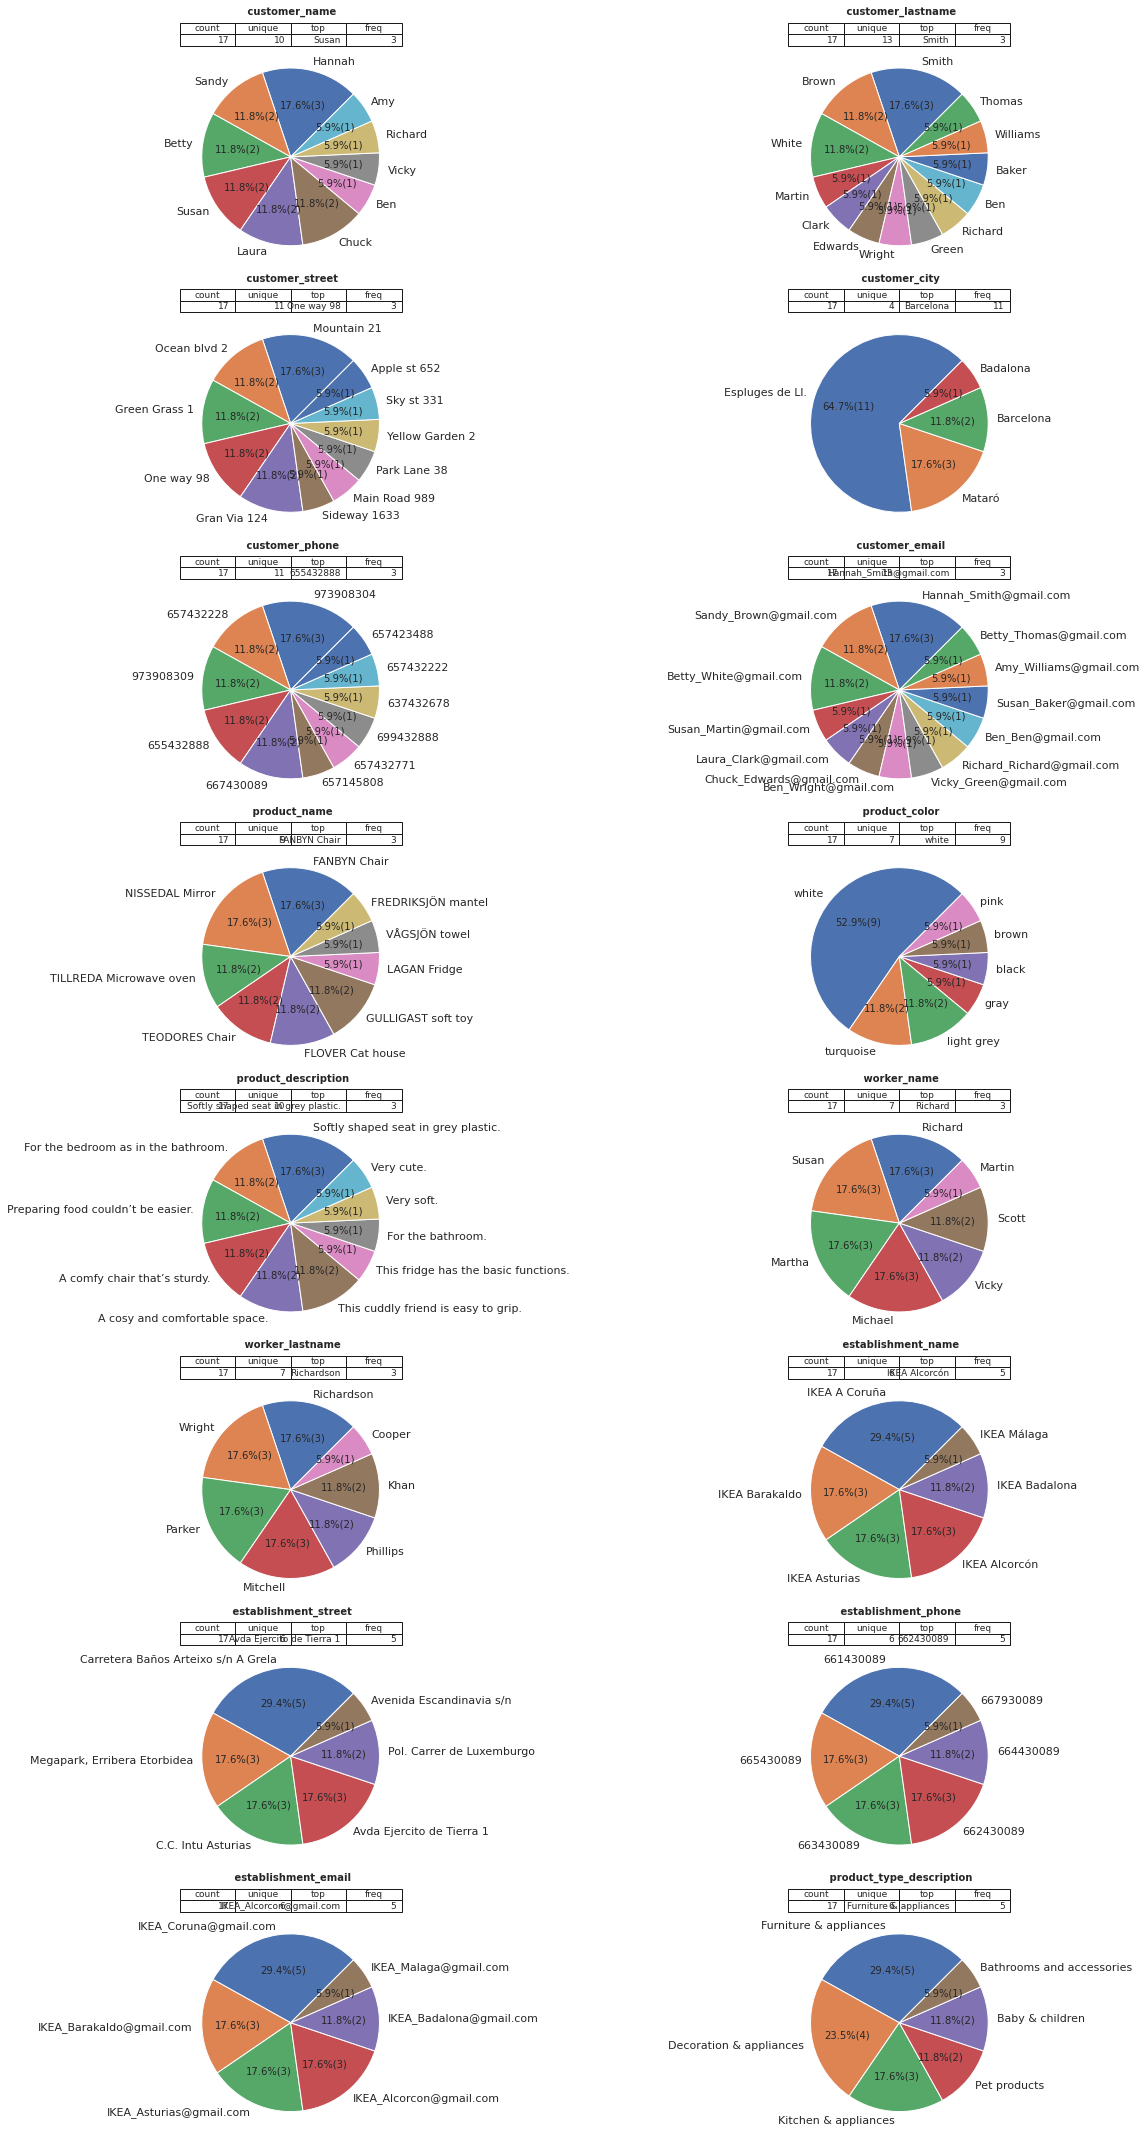

In [136]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(20, 40))
axes = axes.flat
obj_cols = full_transactions.select_dtypes(include="object").columns
for i, colum in enumerate(obj_cols):
        datos = full_transactions[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, color=clr, title="", ax=axes[i])
plt.subplots_adjust(top=0.85)
plt.show()

## Categorical values summary

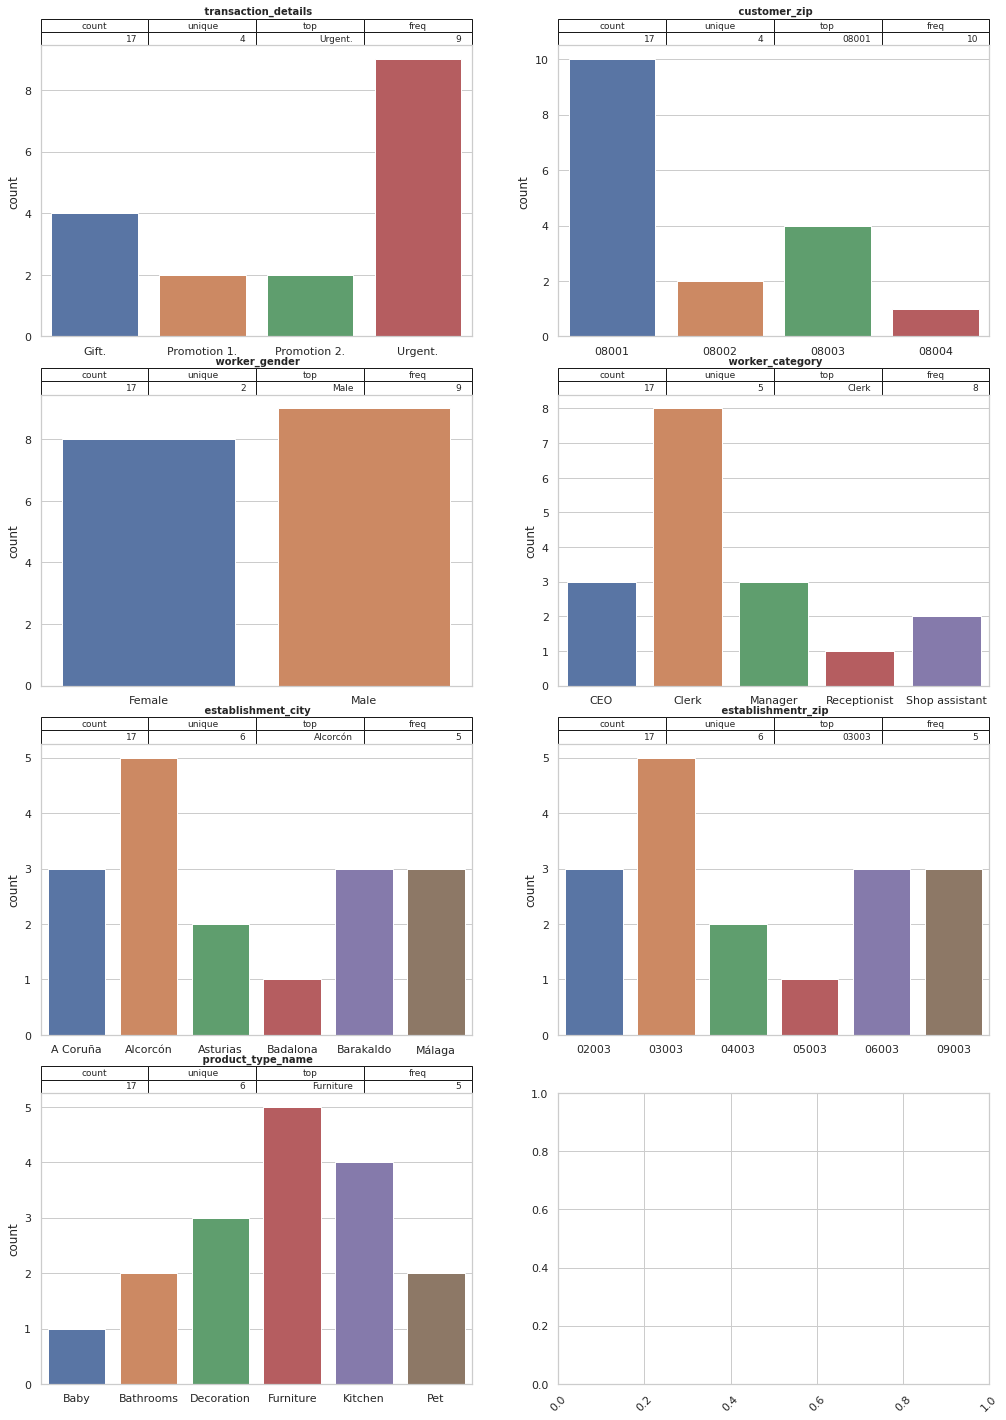

In [132]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 22))
axes = axes.flat
cat_cols = full_transactions.select_dtypes(include='category').columns
for i, colum in enumerate(cat_cols):
        datos = full_transactions[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, color=clr, title="", ax=axes[i])
plt.subplots_adjust(top=0.97)
plt.xticks(rotation=45)
plt.show()

## Numerical values summary

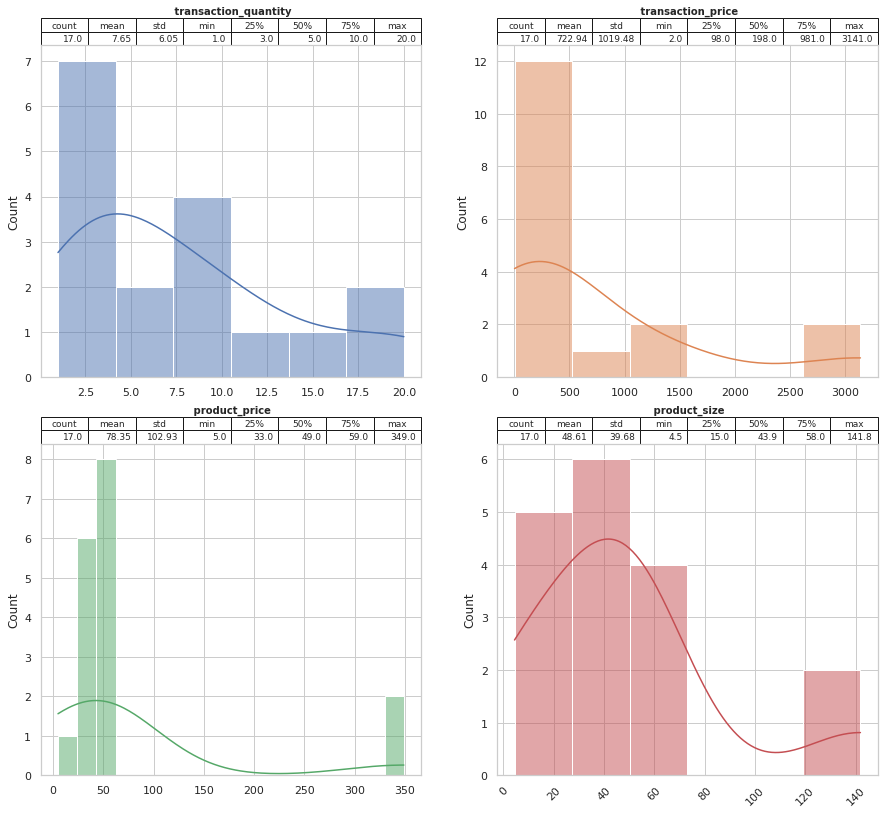

In [99]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
axes = axes.flat
num_cols = full_transactions.select_dtypes(include="number").columns
for i, colum in enumerate(num_cols):
        datos = full_transactions[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, color=clr, title="", ax=axes[i])
plt.subplots_adjust(top=0.97)
plt.xticks(rotation=45)
plt.show()

## Datetime values summary

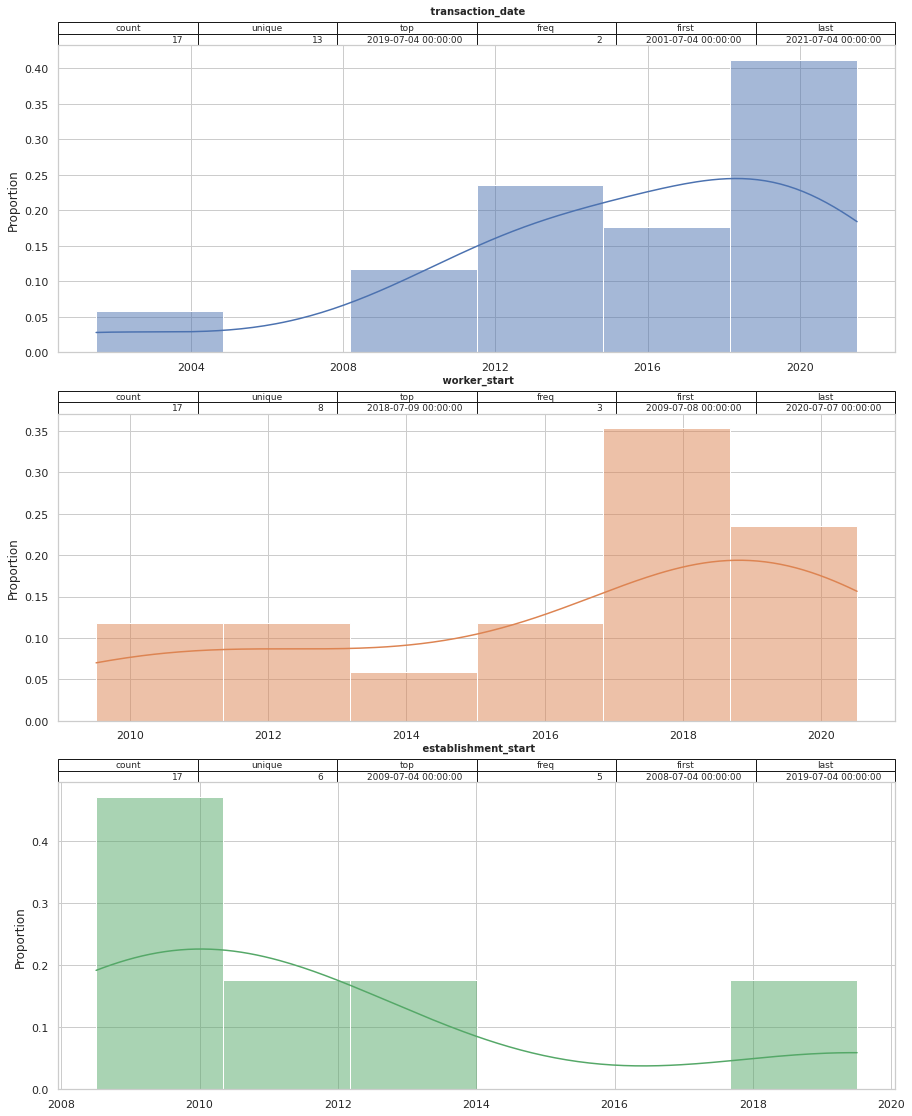

In [139]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(15, 20))
axes = axes.flat
datetime_cols = full_transactions.select_dtypes(include="datetime").columns
for i, colum in enumerate(datetime_cols):
        datos = full_transactions[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, color=clr, title="", ax=axes[i])
plt.subplots_adjust(top=0.85)
plt.show()